<h1 align='center'>Demystifying Convolutional Neural Network</h1>

# Table of Contents

1. <a href='#1'>What is Convolutional Neural Network?</a>
2. <a href='#2'>Why Convolutional Neural Network?</a>
2. <a href='#3'>Problems in Fully Connected Networks</a>
6. <a href='#4'>Demystifying Convolutional Neural Network</a>
    5. <a href='#14'>Input Layer</a>
    7. <a href='#5'>Convolution Operation</a>
    8. <a href='#6'>Edge Detection</a>
    2. <a href='#7'>Padding</a>
    4. <a href='#8'>Stride</a>
5. <a href='#9'>CNN Construction</a>
6. <a href='#10'>Pooling</a>
9. <a href='#11'>CNN with Pooling</a>
8. <a href='#12'>Use case on CNN</a>
15. <a href='#13'>References</a>

<a id='1'></a>
# What is Convolutional Neural Network?

* Convolutional Neural Networks (or CNNs) are special kind of neural architectures that have been specifically designed to handle image data. 
* Since their introduction by (LeCun et al, 1989) in the early 1990's, CNNs have demonstrated excellent performance at tasks such as handwritten digit classification and face detection. 
* In the past few years, several papers have shown that they can also deliver outstanding results on more challenging visual classification tasks. 
* CNN are powerful at the image classification task.
* There are different libraries that already implements CNN such as TensorFlow and Keras.

* CNNs have their own structure and properties. 
* They look different from standard Fully Connected networks but they share the same mechanisms. 
* In both cases, we talk about hidden layers, weights, biases, hidden neurons, loss functions, backpropagation and stochastic gradient descent. 

<a id='2'></a>
# Why Convolutional Neural Network?

* CNN has higher accuracy when compated to others models.
* Most notably (Krizhevsky et al., 2012) show record beating performance on the ImageNet 2012 classification benchmark, with their convnet model (AlexNet) achieving an error rate of 16.4% compared to the second place result of 26.1%.
* CNNs use relatively little pre-processing compared to other image classification algorithms.

* CNNs are not just hype. Several factors are responsible for the renewed interest people got in them.
    * The availability of very large training datasets with millions of labeled examples. 
        * One of the most popular databases is ImageNet.
    * Powerful GPU implementations, making the training of very large models practical. 
    * Enhanced model regularization strategies such as Dropout.

<a id='3'></a>
# Problems in Fully Connected Networks

* Fully connected neural nets are networks where each neuron is connected to every neuron in the adjacent layers. 
* They are the standard and typical neural network architectures.
* To illustrate, here's a 3-hidden layer FC neural net.

<img src='images/fully_connected.png'>

* Using FC networks, images are first converted to a one dimensional vector before being fed as an input.

* For example, a color image of size 256x256, which is represented by object of shape (255, 255, 3) where 3 is the number of color channels, is converted to a vector of size 256 x 256 x 3 = 196608. All we did here was rolling the image into a long vector. Each element of this vector is a pixel value.

* Fully connected networks can be very good classifiers. In the realm of supervised algorithms, they can learn complex non-linear patterns and generalize well assuming we design a robust architecture that doesn't overfit on the data.

**When it comes to processing images, fully connected networks are unfortunately not the right tools.**

**Two main reasons:**

* Let's imagine that we have one hidden layer of 1000 hidden units for our case. 1000 is a reasonable value given the size of the input layer. With this configuration, the number of parameters (or weights) connecting our input layer to the first hidden layer is equal to 196608 x 1000 = 196608000! This is not only a huge number but the network is also not likely to perform very well given that neural networks need in general more than one hidden layer to be robust. But fair enough. Let's say that our network is very good with that one hidden layer and 1000 hidden units. Let's do the math for the memory cost. A weight is a floating value that is encoded in 8 bytes. 196698000 weights would then cost ... 1572864000 bytes which is an approximate value of ~ 1,572 GB . So we'll need 1,572 GB to store the weights of the first hidden layer only. Unless you have a lot of RAM on your laptop, this is clearly not a scalable solution.

* With fully connected networks, we lose the spatial structure that is intrinsic to the image. In fact, after converting the image to a long vector, each pixel value is processed by the network pretty much the same as the other pixels. There is no assumption of spatial correlation between the pixels whatsoever. Each pixel has the same role. This is unfortunately a huge information loss since we lose the dependencies and the similarities between closer pixels. This is an infromation that we want to be encoded in our model.

* To overcome these two limitations, a lot of work have been invested to come up with new neural network architectures that are both scalable and suitable to handle the complexity of the image data.

* And that's when Convolutional Neural Networks (CNNs) came.

<a id='4'></a>
# Demystifying Convolutional Neural Network

* CNNs are composed of five basic blocks: understanding them should give you a clear intuition about the global mechanism.

    * An input layer
    * Convolutional layer
    * ReLU layer
    * Pooling layer
    * Fully Connected layer

* Before diving in each block, here's full CNN architecture.

<img src='images/cnn.png'>

* As you can see, the image is processed throughout the network over many layers and the output neurons hold the predictions for each class.

* Let's understand what each layer does in details.

<a id='14'></a>
## Input Layer

* In fully connected networks, the inputs are depicted as vertical lines of neurons, basically vectors. 
* Whether we process images or not, we always have to tweak our data to switch to this configuration.


* In a convnet, however, when dealing with images, it helps to think about them as squares or neurons where each neuron represents a pixel value. 
* Basically CNNs keep images as they are and don't try to squeeze them in a vector.


* The diagram below shows the difference:

<img src='images/input_image.png'>

<a id='5'></a>
## Convolution Operation

**The convolution layer**

* This layer is the main component of a convnet. Before explaining what it does, we must first understand the main difference between convnets and FC nets in terms of connectivity. 
* This is a crucial idea.


* Fully Connected Networks are literally "fully connected". Or dense, if you wish. 
* This simply means that every neuron in a given layer is connected to all the neurons of the adjacent layers. 
* When a multi dimensional data point flows from one layer to another, the activation of each neuron in a given layer is determined by the weights of all neurons in the previous layers.


* However, things are a bit different for CNNs. They are not fully connected.


* This means that each neuron in a hidden layer is not connected to all neurons of the previous layer. 
* It is rather connected to a patch (generally a small square region) of neurons in the previous layer.


* Here's an example:

<img src='images/conv_1.png'>

* In the above figure, the first neuron of the first hidden layer, which we also call a feature map, is connected to a patch of 3x3 pixels in the input. 
* This hidden neuron depends only on this small region and will ultimately, throughout the learning, capture its characteristics.


* What does the value of this first hidden neuron represent? This is the result of a convolution between a weight matrix called the kernel (the little gray square) and a small region of same size in the image, called the receptive field.


* The operation behind is very simple: it's an element-wise multiplication of two matrices: the 3x3 image region and the kernel of same size. The multiplications are then summed up into an output value. In this example, we have 9 multiplications that are summed into the first hidden neuron.

<img src='images/1.png'>

* This neuron basically learns a visual pattern out of the receptive field. You can think of its value as a intensity that characterises the presence or not of a feature in the image.


* Now what about the other hidden neurons? How are they computed?


* To compute the second hidden neuron, the kernel shifts by a unit on the input image from left to right and applies the same convolution, again with the same filter. Here is how it goes.

<img src='images/conv_2.png'>

* Now let us imagine that the kernel slides over the whole image making a convolution at each step and storing the outputs in the feature map. 
* In practice, this is how it looks like.

<img src='images/conv.gif'>

* This is what the convolution layer does: given a filter, it scans the input and generates a feature map.

<a id='6'></a>
## Edge Detection

* Edge detection is an image processing technique for finding the boundaries of objects within images. It works by detecting discontinuities in brightness. 
* Edge detection is used for image segmentation and data extraction in areas such as image processing, computer vision, and machine vision.


* Common edge detection algorithms include Sobel, Canny, Prewitt, Roberts, and fuzzy logic methods.

<h5 align='center'>Sobel method</h5>
<img src='images/sobel.png'>
<h5 align='center'>Canny method</h5>
<img src='images/canny.png'>

**But what does this convolution operation really represent? How to interpret the resulting feature map?**

* Let us start by stating that convolution layers capture visual patterns within an image.

* We are going to load a cat image from the dataset. Then apply different convolutions on it, changing the kernel each time, and visualizing the results.

In [31]:
# Import the Libraries
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import PIL
import skimage.io
import math

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


(342, 456)


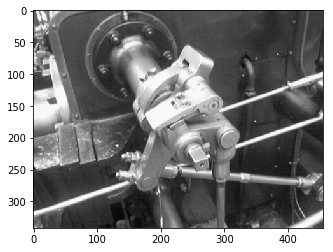

In [32]:
# Loading the image into a numpy array
image = skimage.io.imread('images/test.jpg', as_grey=True)
plt.imshow(image, cmap='gray')
print(image.shape) 

* Now Let us apply horizontal and vertical filters and check, how edges are detected.

In [77]:
# Write the kernel weights as a 2D array. 
kernel_h = np.array([3, 3])
kernel_h = [ [-1,0,1], [-2,0,2], [-1,0,1] ]
kernel_v = np.array([3, 3])
kernel_v = [ [1,2,1], [0,0,0], [-1,-2,-1] ]

In [81]:
with tf.name_scope('convolution'):
    conv_w_h = tf.constant(kernel_h, dtype=tf.float32, shape=(3, 3, 1, 1))
    conv_w_v = tf.constant(kernel_v, dtype=tf.float32, shape=(3, 3, 1, 1))    
    output_h = tf.nn.conv2d(input=input_placeholder, filter=conv_w_h, strides=[1, 1, 1, 1], padding='SAME')
    output_v = tf.nn.conv2d(input=input_placeholder, filter=conv_w_v, strides=[1, 1, 1, 1], padding='SAME')

In [88]:
with tf.Session() as sess:
    result_h = sess.run(output_h, feed_dict={
            input_placeholder: image[np.newaxis, :, :, np.newaxis]})
    result_v = sess.run(output_v, feed_dict={
            input_placeholder: image[np.newaxis, :, :, np.newaxis]})

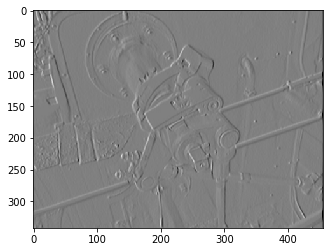

In [89]:
plt.imshow(result_h[0, :, :, 0],cmap='gray') # view horizontal edges

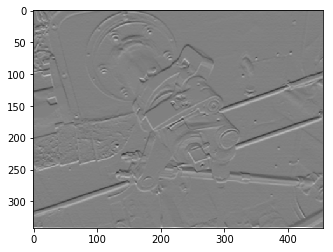

In [90]:
plt.imshow(result_v[0, :, :, 0],cmap='gray') # view vertical edges

<a id='7'></a>
## Padding

* Padding is to add extra pixels outside the image. And zero padding means every pixel value that you add is zero.

* Let us see some figures. The black color part is the original size of the image.



<img src='images/2.png'>


* If zero padding = 1, there will be one pixel thick around the original image with pixel value = 0.



<img src='images/3.png'>


* Every time we use the filter (a.k.a. kernel) to scan the image, the size of the image will go smaller and smaller. 
* We don’t want that, because we wanna preserve the original size of the image to extract some low level features. 
* Therefore, we will add some extra pixels outside the image!

* A **valid convolution** is a type of convolution operation that does not use any padding on the input.
* For an n×n input matrix and an f×f filter, a valid convolution will return an output matrix of dimensions

<img src='images/4.png'>

* where s is the stride length of the convolution.

* This is in contrast to a **same convolution**, which pads the n×n input matrix such that the output matrix is also n×n.

<a id='8'></a>
## Stride

* In convolutions, the stride is the number of horizontal and vertical steps that the filter takes over the original matrix

* Stride controls how the filter convolves around the input volume. 
* In the example we had in part 1, the filter convolves around the input volume by shifting one unit at a time. 
* The amount by which the filter shifts is the stride. In that case, the stride was implicitly set at 1. 
* Stride is normally set in a way so that the output volume is an integer and not a fraction. 
* Let’s look at an example. 
    * Let’s imagine a 7 x 7 input volume, a 3 x 3 filter (Disregard the 3rd dimension for simplicity), and a stride of 1. This is the case that we’re accustomed to.

<img src='images/Stride1.png'>

* So, as you can see in below image, the receptive field is shifting by 2 units now and the output volume shrinks as well. Notice that if we tried to set our stride to 3, then we’d have issues with spacing and making sure the receptive fields fit on the input volume.

<img src='images/Stride2.png'>

<a id='9'></a>
# CNN Construction

* Now let us construct a simple Convolutional Neural Network.
* Below is the small video, which explains what really happens in single layer of Convolutional neural network.

<center>
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>

* Now let us dive deep into the single layer of CNN

<img src='images/9.png'>

* How many parameters does each layer of CNN has? How to calculate it?
    * Just find the number of parameters in one filter in that layer inclusive of bias parameter, and then multiply it with the total number of filters in that layer.

<img src='images/10.png'>

* One Remainder for the whole.

<img src='images/11.png'>

* Now we are going to see an example Convolutional Neural Network, with Fully connected Neural Network for final prediction.

<img src='images/8.png'>

<a id='10'></a>
# Pooling

* The rectified feature maps now go throught a pooling layer. 
* Pooling is a down-sampling operation that reduces the dimensionality of the feature map.


* The most common pooling operation is max-pooling. 
* It involves a small window of usally size 2x2 which slides by a stride of 2 over the rectified feature map and takes the largest element at each step

<img src='images/max_pooling.png'>

* For example a 10x10 rectified feature map is converted to a 5x5 output.


* Max-pooling has many benefits:

    * It reduces the size of the rectified feature maps and the number of trainable parameters, thus controlling overfitting
    * It condenses the feature maps by retaining the most important features
    * It makes the network invariant to small transformations, distortions and translations in the input image (a small distortion in input will not change the output of Pooling – since we take the maximum value in a local neighborhood)

* Other options for pooling layers are **Average pooling and L2-norm pooling**

<img src='images/5.png'>

<a id='11'></a>
# CNN with Pooling

* Now we are going to see the implementation of whole CNN with Convolution layers, pooling layers and Fully connected layers.

<img src='images/7.png'>

* Finally the following table shows how the parameters gets reduced while passing through the layers of CNN

<img src='images/6.png'>

<a id='12'></a>
# Use case on CNN

* In this section, we will walkthrough a quick use case of CNN.
* The Walkthrough has used SIGNS dataset, which has hand signs representing numbers from 0 to 5. 
* We will use CNN to train and recognize the hand signs with higher accuracy using Tensorflow Framework.

* As usual, we will start by loading in the packages.

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

* Run the next cell to load the "SIGNS" dataset you are going to use.

In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 2


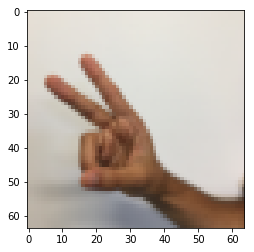

In [3]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

* let's examine the shapes of your data. 

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### Create placeholders

TensorFlow requires that you create placeholders for the input data that will be fed into the model when running the session.

In [5]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """
    
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    
    return X, Y

In [6]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


### Initialize parameters

You will initialize weights/filters $W1$ and $W2$ using `tf.contrib.layers.xavier_initializer(seed = 0)`. You don't need to worry about bias variables as you will soon see that TensorFlow functions take care of the bias. Note also that you will only initialize the weights/filters for the conv2d functions. TensorFlow initializes the layers for the fully connected part automatically.

In [7]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [8]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


### Forward propagation

In TensorFlow, there are built-in functions that carry out the convolution steps for you.

- **tf.nn.conv2d(X,W1, strides = [1,s,s,1], padding = 'SAME'):** given an input $X$ and a group of filters $W1$, this function convolves $W1$'s filters on X. The third input ([1,f,f,1]) represents the strides for each dimension of the input (m, n_H_prev, n_W_prev, n_C_prev). You can read the full documentation [here](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)

- **tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME'):** given an input A, this function uses a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window. You can read the full documentation [here](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool)

- **tf.nn.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](https://www.tensorflow.org/api_docs/python/tf/nn/relu)

- **tf.contrib.layers.flatten(P)**: given an input P, this function flattens each example into a 1D vector it while maintaining the batch-size. It returns a flattened tensor with shape [batch_size, k]. You can read the full documentation [here.](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/flatten)

- **tf.contrib.layers.fully_connected(F, num_outputs):** given a the flattened input F, it returns the output computed using a fully connected layer. You can read the full documentation [here.](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/fully_connected)

In the last function above (`tf.contrib.layers.fully_connected`), the fully connected layer automatically initializes weights in the graph and keeps on training them as you train the model. Hence, you did not need to initialize those weights when initializing the parameters. 

In [23]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding='SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    # FLATTEN
    P = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P, 6, activation_fn=None)

    return Z3

In [24]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))

Z3 = [[ 1.4416984  -0.24909666  5.450499   -0.2618962  -0.20669907  1.3654671 ]
 [ 1.4070846  -0.02573211  5.08928    -0.48669922 -0.40940708  1.2624859 ]]


### Compute cost

Implement the compute cost function below. You might find these two functions helpful: 

- **tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y):** computes the softmax entropy loss. This function both computes the softmax activation function as well as the resulting loss. You can check the full documentation  [here.](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits)
- **tf.reduce_mean:** computes the mean of elements across dimensions of a tensor. Use this to sum the losses over all the examples to get the overall cost. You can check the full documentation [here.](https://www.tensorflow.org/api_docs/python/tf/reduce_mean)

In [25]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [26]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

cost = 4.6648693


## Model 

Finally you will merge the helper functions you implemented above to build a model. You will train it on the SIGNS dataset. 


In [30]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.009,
          num_epochs=200, minibatch_size=64, print_cost=True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 1.921332
Cost after epoch 5: 1.904156
Cost after epoch 10: 1.904309
Cost after epoch 15: 1.904477
Cost after epoch 20: 1.901876
Cost after epoch 25: 1.784077
Cost after epoch 30: 1.681051
Cost after epoch 35: 1.618206
Cost after epoch 40: 1.597971
Cost after epoch 45: 1.566706
Cost after epoch 50: 1.554487
Cost after epoch 55: 1.502187
Cost after epoch 60: 1.461035
Cost after epoch 65: 1.304489
Cost after epoch 70: 1.201760
Cost after epoch 75: 1.163242
Cost after epoch 80: 1.102886
Cost after epoch 85: 1.087105
Cost after epoch 90: 1.052086
Cost after epoch 95: 1.013742
Cost after epoch 100: 0.997967
Cost after epoch 105: 0.958762
Cost after epoch 110: 0.970833
Cost after epoch 115: 0.934720
Cost after epoch 120: 0.929673
Cost after epoch 125: 0.896583
Cost after epoch 130: 0.915795
Cost after epoch 135: 0.854602
Cost after epoch 140: 0.858630
Cost after epoch 145: 0.815800
Cost after epoch 150: 0.813106
Cost after epoch 155: 0.788154
Cost after epoch 160: 0.779234

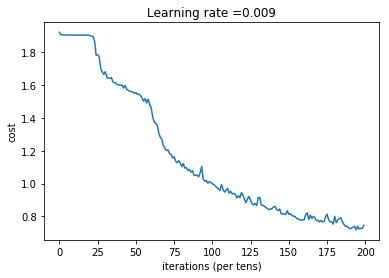

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.7416667
Test Accuracy: 0.65833336


In [31]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)

Once again, here's a thumbs up for your work! 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


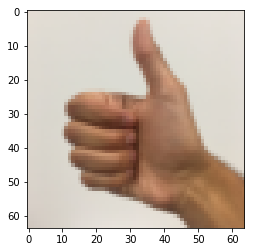

In [32]:
fname = "images/thumbs_up.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
plt.imshow(my_image)

<a id='13'></a>
# References

* https://www.coursera.org/learn/convolutional-neural-networks/
* https://www.kdnuggets.com/2017/11/understanding-deep-convolutional-neural-networks-tensorflow-keras.html
* https://www.kdnuggets.com/2016/11/intuitive-explanation-convolutional-neural-networks.html
* https://www.kdnuggets.com/2018/04/building-convolutional-neural-network-numpy-scratch.html